In [22]:
from pathlib import Path

import numpy as np
import xarray as xr
from scipy.ndimage import shift
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt

from gfatpy.lidar.plot.quicklook import quicklook_xarray
from gfatpy.lidar.preprocessing import preprocess
    
%matplotlib inline

In [2]:
p = Path("/mnt/NASGFAT/datos/MULHACEN/1a/2022/03/23/mhc_1a_Prs_rs_xf_20220323.nc")

In [3]:
lidar = preprocess(p)

<class 'numpy.ndarray'>


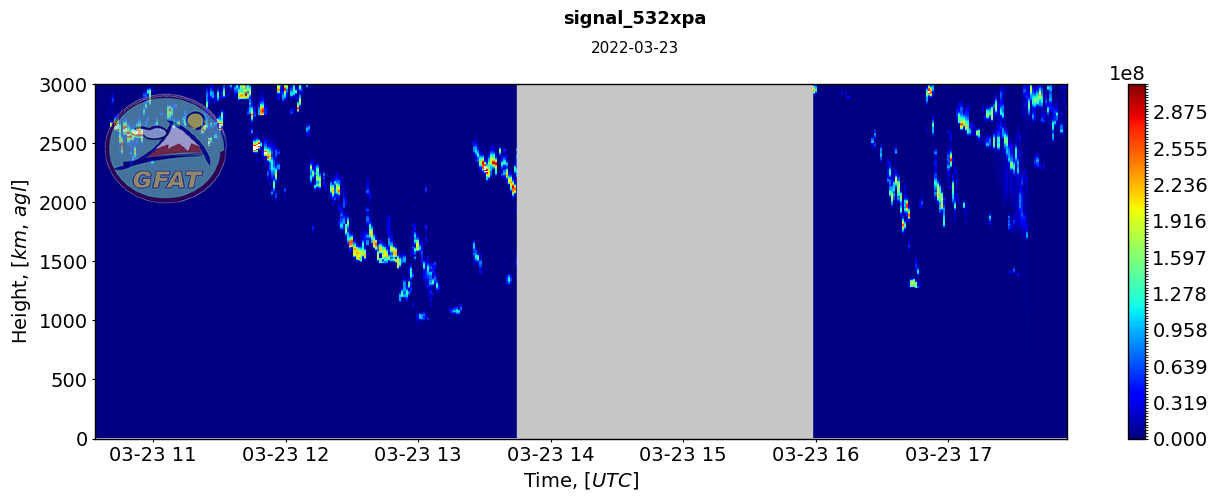

In [4]:
quicklook_xarray(lidar.signal_532xpa[:, :400], is_rcs = False)

In [70]:
lidar.signal_532xpa[104]

<xarray.DataArray 'signal_532xpa' (range: 16380)>
array([-0.00636587,  0.01345692,  0.01262193, ..., -0.00305185,
        0.00104313,  0.00101018])
Coordinates:
    time     datetime64[ns] 2022-03-23T12:16:27
  * range    (range) float32 7.5 15.0 22.5 ... 1.228e+05 1.228e+05 1.228e+05
Attributes:
    long_name:  signal
    overlap:    0
    units:      mV

In [76]:
@interact(bz_532xpp = (-5, 15, 1))
def b_shift(bz_532xpp):
    n_profile = 104
    y_range = slice(3050, 3400)

    y = lidar.range.sel(range=y_range)
    reference = lidar.signal_532xpa[n_profile].sel(range=y_range) * y**2
    xpp = shift(lidar.signal_532xpp[n_profile].sel(range=y_range) * y**2, bz_532xpp, cval=0)

    plt.plot(reference, y, label = "532xpa", c = 'g')

    plt.twiny()
    plt.plot(
        xpp, y, label = "532xpp", c = 'g', ls = "dashed"
    )
    conv = np.convolve(xpp, reference, 'same')
    # plt.show()
    # plt.plot(conv)
    # plt.show()
    
    print(conv.argmax())
    print(reference.values.argmax())
    

interactive(children=(IntSlider(value=5, description='bz_532xpp', max=15, min=-5), Output()), _dom_classes=('w…

In [77]:
@interact(bz_532xsp = (-5, 15, 1))
def b_shift(bz_532xsp):
    n_profile = 104
    y_range = slice(3050, 3400)

    y = lidar.range.sel(range=y_range)
    reference = lidar.signal_532xpa[n_profile].sel(range=y_range) * y**2
    xsp = shift(lidar.signal_532xsp[n_profile].sel(range=y_range) * y**2, bz_532xsp, cval=0)

    plt.plot(reference, y, label = "532xpa", c = 'g')

    plt.twiny()
    plt.plot(
        xsp, y, label = "532xsp", c = 'g', ls = "dashed"
    )
    conv = np.convolve(xsp, reference, 'same').argmax()
    
    print(conv)
    print(reference.values.argmax())

interactive(children=(IntSlider(value=5, description='bz_532xsp', max=15, min=-5), Output()), _dom_classes=('w…

In [80]:
@interact(bz_355xtp = (-5, 15, 1))
def b_shift(bz_355xtp):
    n_profile = 104
    y_range = slice(3050, 3400)

    y = lidar.range.sel(range=y_range)
    reference = lidar.signal_532xpa[n_profile].sel(range=y_range) * y**2
    xtp = shift(lidar.signal_355xtp[n_profile].sel(range=y_range) * y**2, bz_355xtp, cval=0)

    plt.plot(reference, y, label = "532xpa", c = 'g')

    plt.twiny()
    plt.plot(
       xtp, y, label = "355xtp", c = 'b', ls = "dashed"
    )
    conv = np.convolve(xtp, reference, 'same').argmax()
    
    print(conv)
    print(reference.values.argmax())

interactive(children=(IntSlider(value=5, description='bz_355xtp', max=15, min=-5), Output()), _dom_classes=('w…

In [81]:
@interact(bz_530xtp= (-5, 15, 1), bz_354xtp = (-5, 15, 1), bz_408xtp = (-5, 15, 1))
def b_shift(bz_530xtp, bz_354xtp, bz_408xtp):
    n_profile = 142
    y_range = slice(1000, 1400)

    y = lidar.range.sel(range=y_range)

    plt.plot(lidar.signal_355xta[n_profile].sel(range=y_range) * y**2, y, label = "355xta", c = 'b')
    plt.twiny()
    plt.plot(
        lidar.signal_354xtp [n_profile].sel(range=y_range) * y**2, y + (7.5 * bz_354xtp ), label = "354xtp ", c = 'b', ls = "dashed"
    )
    # 408 is NAN
    plt.plot(
        lidar.signal_408xtp[n_profile].sel(range=y_range) * y**2, y + (7.5 * bz_408xtp), label = "408xtp", c = 'b', ls = "dashed"
    )
    # 530 is NAN
    plt.plot(
        lidar.signal_530xtp [n_profile].sel(range=y_range) * y**2, y + (7.5 * bz_530xtp ), label = "530xtp ", c = 'b', ls = "dashed"
    )
    

interactive(children=(IntSlider(value=5, description='bz_530xtp', max=15, min=-5), IntSlider(value=5, descript…

In [10]:
lidar.signal_530xtp

<xarray.DataArray 'signal_530xtp' (time: 313, range: 16380)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) datetime64[ns] 2022-03-23T10:34:11 ... 2022-03-23T17:53:07
  * range    (range) float32 7.5 15.0 22.5 ... 1.228e+05 1.228e+05 1.228e+05
Attributes:
    long_name:  signal
    overlap:    0
    units:

In [11]:
lidar.signal_354xtp

<xarray.DataArray 'signal_354xtp' (time: 313, range: 16380)>
array([[ 3.83128896,  4.57958952,  5.02176634, ..., -0.96462855,
         0.19183317,  0.05578008],
       [ 3.07382207,  3.03980832,  4.19627004, ..., -0.12345691,
        -0.53162189, -0.02141757],
       [ 5.1194764 ,  4.43920525,  4.91539582, ...,  0.69770821,
        -0.86691753, -0.32269946],
       ...,
       [ 3.30579264,  4.87041838,  3.78198273, ..., -0.02754085,
        -0.29964964,  0.3125952 ],
       [ 3.85240856,  3.98846308,  4.83880344, ...,  0.38302103,
        -0.29725131, -0.12718305],
       [ 4.0358134 ,  4.47799022,  5.12424858, ..., -0.24990098,
        -0.18187373, -0.18187373]])
Coordinates:
  * time     (time) datetime64[ns] 2022-03-23T10:34:11 ... 2022-03-23T17:53:07
  * range    (range) float32 7.5 15.0 22.5 ... 1.228e+05 1.228e+05 1.228e+05
Attributes:
    long_name:  signal
    overlap:    0
    units:      MHz